In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [2]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):
        super(ThreeLayersNet, self).__init__()
        self.fc1 = nn.Linear(nX, nH1)
        self.fc2 = nn.Linear(nH1, nH2)
        self.fc3 = nn.Linear(nH2, nY)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.Sigmoid()(x)
        x = self.fc2(x)
        x = nn.Sigmoid()(x)
        x = self.fc3(x)
        x = nn.Sigmoid()(x)
        return x

In [3]:
X = torch.rand(1200, 2)
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1, 1)

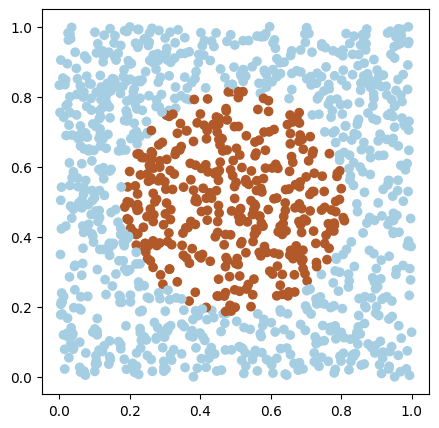

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)
plt.show()

In [5]:
model = ThreeLayersNet(2, 5, 4, 1)

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [8]:
def fit(model, X,Y, batch_size=100, train=True):
      model.train(train)
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size )

      for i in range(0, numB*batch_size, batch_size):
        xb = X[i: i+batch_size]
        yb = Y[i: i+batch_size]

        y = model(xb)
        L = loss(y, yb)

        if train:
            optimizer.zero_grad()
            L.backward()
            optimizer.step()

        sumL += L.item()
        sumA += (y.round() == yb).float().mean()

        return sumL/numB,  sumA/numB

In [9]:

print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )

epochs = 10000
for epoch in range(epochs):
    L,A = fit(model, X, Y)

    if epoch % 100 == 0 or epoch == epochs-1:
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' )

before:      loss: 0.0511 accuracy: 0.0583
epoch:     0 loss: 0.0510 accuracy: 0.0583
epoch:   100 loss: 0.0509 accuracy: 0.0583
epoch:   200 loss: 0.0509 accuracy: 0.0583
epoch:   300 loss: 0.0508 accuracy: 0.0583
epoch:   400 loss: 0.0508 accuracy: 0.0583
epoch:   500 loss: 0.0506 accuracy: 0.0583
epoch:   600 loss: 0.0504 accuracy: 0.0583
epoch:   700 loss: 0.0497 accuracy: 0.0583
epoch:   800 loss: 0.0481 accuracy: 0.0583
epoch:   900 loss: 0.0453 accuracy: 0.0583
epoch:  1000 loss: 0.0433 accuracy: 0.0583
epoch:  1100 loss: 0.0418 accuracy: 0.0583
epoch:  1200 loss: 0.0364 accuracy: 0.0642
epoch:  1300 loss: 0.0342 accuracy: 0.0667
epoch:  1400 loss: 0.0337 accuracy: 0.0675
epoch:  1500 loss: 0.0329 accuracy: 0.0667
epoch:  1600 loss: 0.0301 accuracy: 0.0675
epoch:  1700 loss: 0.0174 accuracy: 0.0767
epoch:  1800 loss: 0.0113 accuracy: 0.0800
epoch:  1900 loss: 0.0090 accuracy: 0.0800
epoch:  2000 loss: 0.0076 accuracy: 0.0808
epoch:  2100 loss: 0.0066 accuracy: 0.0817
epoch:  220

In [10]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)


In [11]:
dict(model.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[-8.0759e+00, -1.9162e+00],
         [ 4.0102e+00,  1.5052e+01],
         [-6.7470e+00,  6.2597e-03],
         [-5.8170e+00,  1.2658e+01],
         [ 7.8298e+00,  4.3457e+00]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 5.6325, -7.6595,  2.3339, -6.7712, -8.0022], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[  6.0730,   8.3383,   3.4923,  -8.8061,  -9.2067],
         [ -7.1884, -11.3636,  -2.8694,  10.3887,  10.9291],
         [ -0.7156,  -4.8964,   2.2407,   4.6014,   1.5675],
         [  4.9614, -10.4052,   6.2405,  12.5001,  -6.0452]],
        requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-2.7916,  4.6375,  1.3100, -4.5589], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[ 17.4229, -19.8771,  -7.4709, -22.9143]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([1.6777], requires_grad=True)}

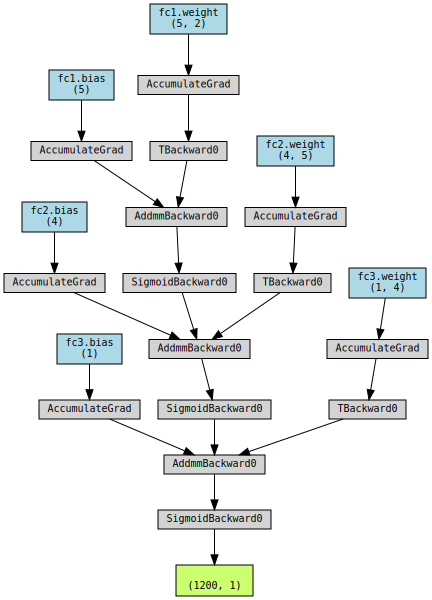

In [12]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))